<a href="https://colab.research.google.com/github/dickyadem/Clasification-Image-Flowers-CNN-with-Tensorflow-Accuracy-89-/blob/main/Clasification_CNN_with_Tensorflow_Accuracy_89_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!cp kaggle.json ~/.kaggle/

In [10]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 94% 212M/225M [00:01<00:00, 208MB/s]
100% 225M/225M [00:01<00:00, 155MB/s]


In [2]:
import zipfile,os
local_zip = '/content/flowers-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
dataset="/content/flowers"

In [4]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4
                    )


In [5]:
train_generator = datagen.flow_from_directory(
        dataset,  
        target_size=(150, 150), 
        batch_size=64,
        class_mode='categorical',
        subset="training")
 
validation_generator = datagen.flow_from_directory(
        dataset, 
        target_size=(150, 150), 
        batch_size=64, 
        class_mode='categorical',
        subset='validation')

Found 2593 images belonging to 5 classes.
Found 1724 images belonging to 5 classes.


In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, input_shape=(2,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [ ]:
model.summary()

In [84]:
 model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [87]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    validation_steps = 25,
    epochs = 25,
    verbose=1,
)

Epoch 1/25
25/25 [==============================] - 81s 3s/step - loss: 1.2328 - accuracy: 0.8106
Epoch 2/25
25/25 [==============================] - 78s 3s/step - loss: 1.1690 - accuracy: 0.8246
Epoch 3/25
25/25 [==============================] - 77s 3s/step - loss: 1.1270 - accuracy: 0.8306
Epoch 4/25
25/25 [==============================] - 78s 3s/step - loss: 1.0505 - accuracy: 0.8439
Epoch 5/25
25/25 [==============================] - 77s 3s/step - loss: 1.0389 - accuracy: 0.8461
Epoch 6/25
25/25 [==============================] - 79s 3s/step - loss: 0.9657 - accuracy: 0.8601
Epoch 7/25
25/25 [==============================] - 76s 3s/step - loss: 0.9870 - accuracy: 0.8554
Epoch 8/25
25/25 [==============================] - 78s 3s/step - loss: 0.9096 - accuracy: 0.8631
Epoch 9/25
25/25 [==============================] - 77s 3s/step - loss: 0.9093 - accuracy: 0.8650
Epoch 10/25
25/25 [==============================] - 76s 3s/step - loss: 0.9033 - accuracy: 0.8650
Epoch 11/25
25/25 [

In [16]:
from matplotlib import pyplot as plt

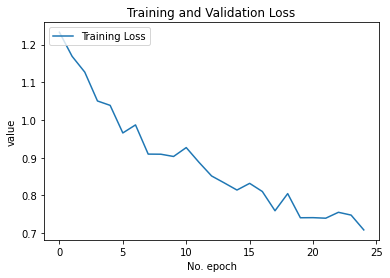

In [88]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

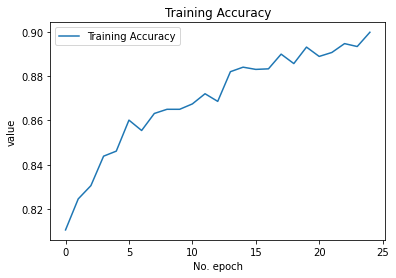

In [94]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Saving download.jpg to download.jpg
download.jpg
  tulip


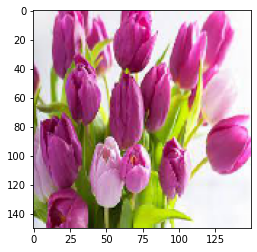

In [93]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  
  if classes[0][4]==1:
    print('  tulip')                                 
  elif classes[0][3]==1:
    print(' sunflower')                                   
  elif classes[0][2]==1:
    print(' rose')
  elif classes[0][1]==1:
    print(' dandelion')                                   
  elif classes[0][0]==1:
    print(' daisy')                                   
  else:
      print('tidak termasuk bunga')